In [11]:

import yfinance as yf

assets = ['ONGC.NS', 'VEDL.NS', 'IOC.NS', 'BPCL.NS']  # Example of diverse securities
start_date = '2023-01-01'
end_date = '2024-03-04'
data = yf.download(assets, start=start_date, end=end_date)
print(data.head())

[*********************100%***********************]  4 of 4 completed

Price            Close                                           High  \
Ticker         BPCL.NS     IOC.NS     ONGC.NS     VEDL.NS     BPCL.NS   
Date                                                                    
2023-01-02  149.784210  69.066399  132.808258  230.718521  150.165572   
2023-01-03  151.130188  69.509132  132.013794  233.236664  151.646141   
2023-01-04  150.883423  69.154945  129.100754  225.025406  152.902380   
2023-01-05  153.597794  70.040413  129.321426  227.251556  153.866991   
2023-01-06  154.652145  70.881599  130.071777  226.010696  155.482150   

Price                                                 Low             \
Ticker         IOC.NS     ONGC.NS     VEDL.NS     BPCL.NS     IOC.NS   
Date                                                                   
2023-01-02  69.553408  133.117223  232.105309  146.957662  67.693923   
2023-01-03  69.863320  132.940674  234.732954  148.774738  68.800756   
2023-01-04  70.394600  131.395884  232.397310  149.9188

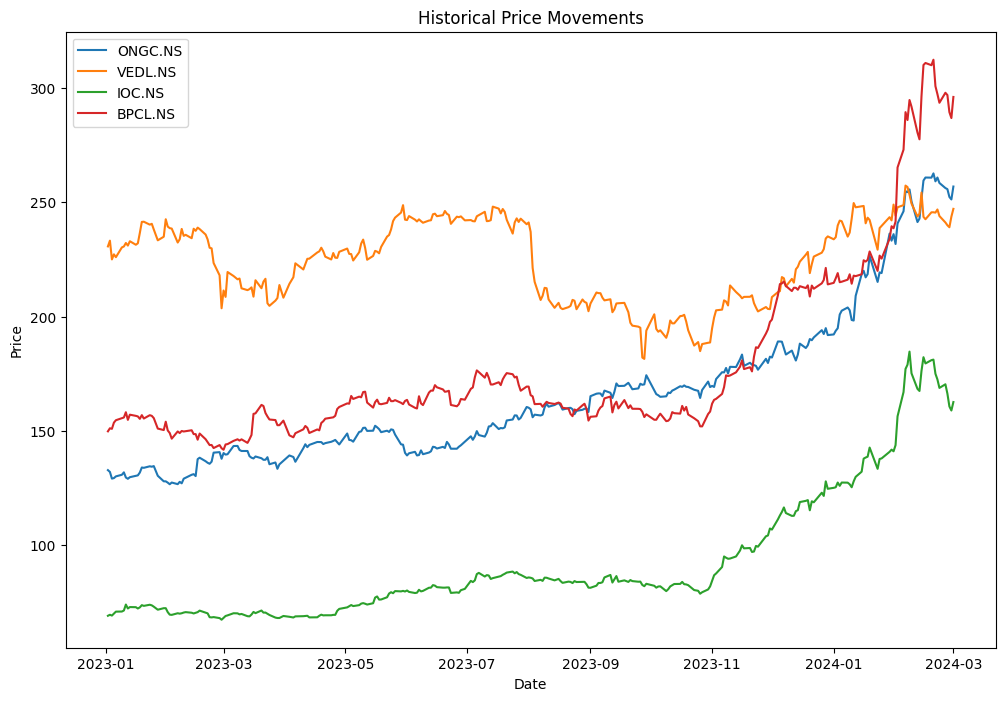

In [12]:
import matplotlib.pyplot as plt
# Visualizing the price movements of the selected assets
plt.figure(figsize=(12, 8))
for asset in assets:
    plt.plot(data['Close'][asset], label=asset)
plt.title('Historical Price Movements')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

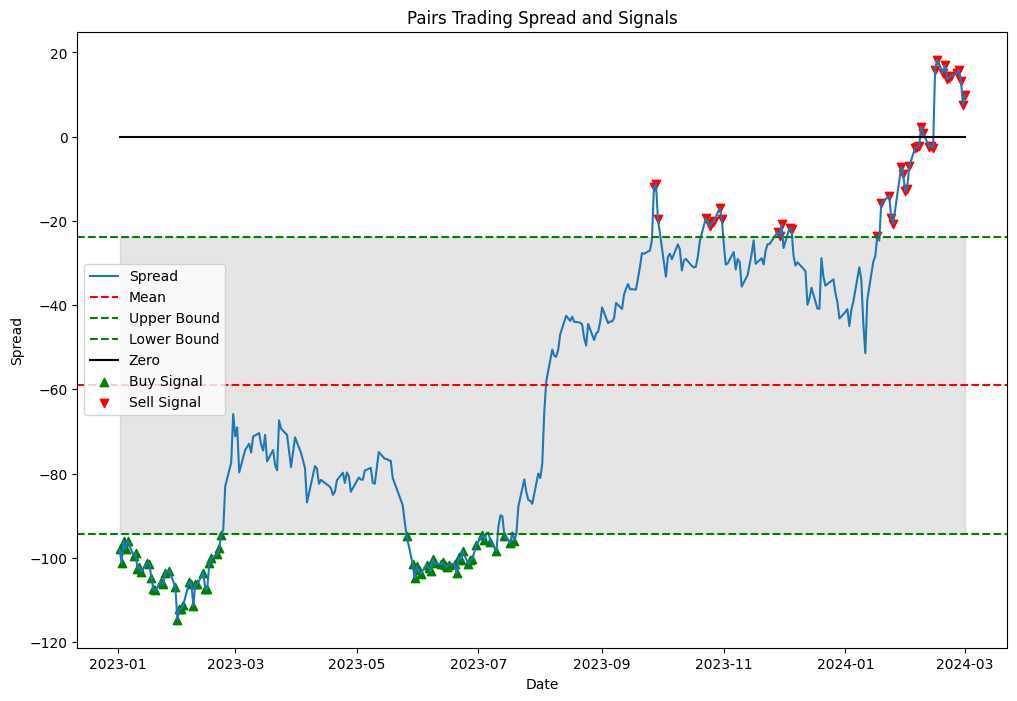

In [14]:
import numpy as np
# Implementing a simple pairs trading strategy
asset1 = 'ONGC.NS'
asset2 = 'VEDL.NS'
spread = data['Close'][asset1] - data['Close'][asset2]
spread_mean = np.mean(spread)
spread_std = np.std(spread)
# Generating buy/sell signals based on the spread
z_score = (spread - spread_mean) / spread_std
buy_signal = z_score < -1.0
sell_signal = z_score > 1.0
# Visualizing the spread and buy/sell signals
plt.figure(figsize=(12, 8))
plt.plot(spread, label='Spread')
plt.axhline(spread_mean, color='r', linestyle='--', label='Mean')
plt.axhline(spread_mean + spread_std, color='g', linestyle='--', label='Upper Bound')
plt.axhline(spread_mean - spread_std, color='g', linestyle='--', label='Lower Bound')
plt.fill_between(spread.index, spread_mean + spread_std, spread_mean - spread_std, color='gray', alpha=0.2)
plt.plot(spread.index, np.zeros(len(spread)), 'k-', label='Zero')
plt.scatter(spread[buy_signal].index, spread[buy_signal], marker='^', color='g', label='Buy Signal')
plt.scatter(spread[sell_signal].index, spread[sell_signal], marker='v', color='r', label='Sell Signal')
plt.title('Pairs Trading Spread and Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()

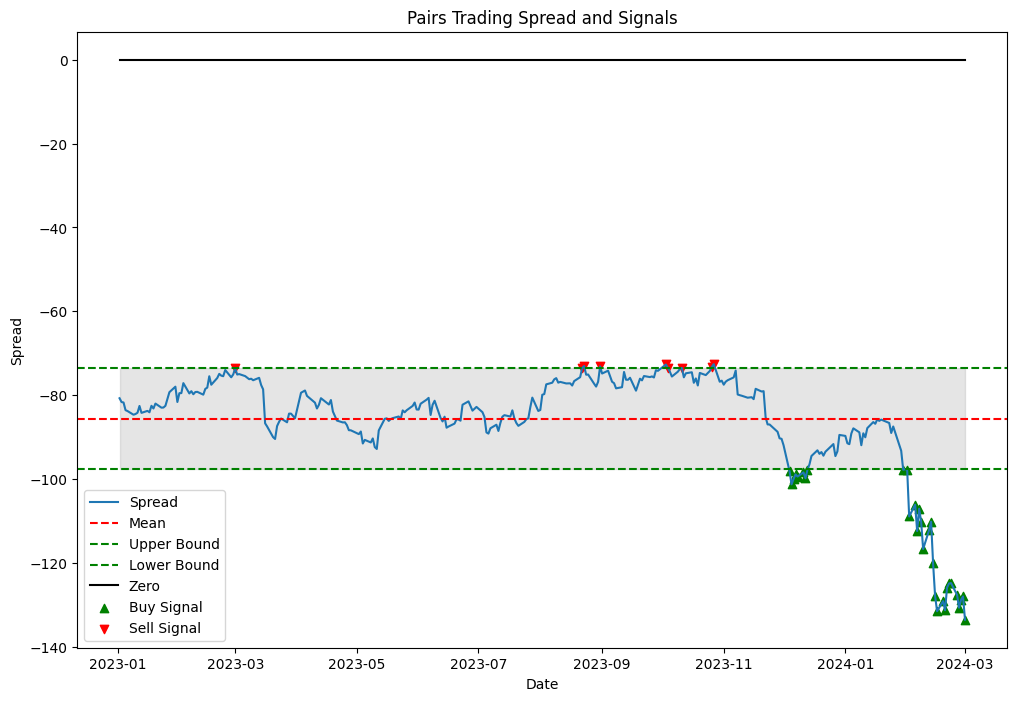

In [15]:
asset1 = 'IOC.NS'
asset2 = 'BPCL.NS'
spread = data['Close'][asset1] - data['Close'][asset2]
spread_mean = np.mean(spread)
spread_std = np.std(spread)
# Generating buy/sell signals based on the spread
z_score = (spread - spread_mean) / spread_std
buy_signal = z_score < -1.0
sell_signal = z_score > 1.0
# Visualizing the spread and buy/sell signals
plt.figure(figsize=(12, 8))
plt.plot(spread, label='Spread')
plt.axhline(spread_mean, color='r', linestyle='--', label='Mean')
plt.axhline(spread_mean + spread_std, color='g', linestyle='--', label='Upper Bound')
plt.axhline(spread_mean - spread_std, color='g', linestyle='--', label='Lower Bound')
plt.fill_between(spread.index, spread_mean + spread_std, spread_mean - spread_std, color='gray', alpha=0.2)
plt.plot(spread.index, np.zeros(len(spread)), 'k-', label='Zero')
plt.scatter(spread[buy_signal].index, spread[buy_signal], marker='^', color='g', label='Buy Signal')
plt.scatter(spread[sell_signal].index, spread[sell_signal], marker='v', color='r', label='Sell Signal')
plt.title('Pairs Trading Spread and Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()


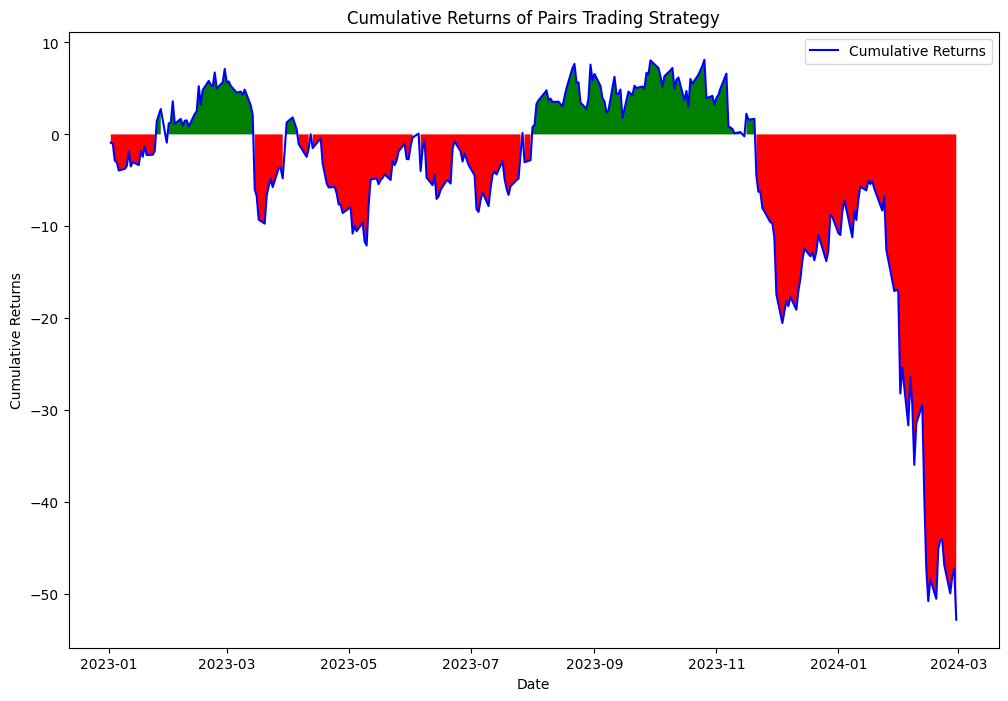

In [16]:
import matplotlib.pyplot as plt

returns = spread.shift(-1) - spread
cumulative_returns = returns.cumsum()

plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label='Cumulative Returns', color='b')


plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns >= 0), facecolor='green')
plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns <= 0), facecolor='red')

plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
